In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# model training libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# metric library
from sklearn import metrics

# setting a random seed for reproducability
np.random.seed(1111)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/adult 3.csv')

**Analysing The Data**

In [5]:
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data.shape

(48842, 15)

In [8]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [10]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


In [11]:
data.duplicated().sum()

np.int64(52)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
import matplotlib.pyplot as plt

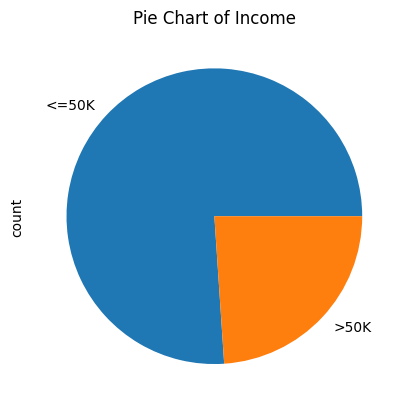

In [14]:
data["income"].value_counts().plot(kind="pie")
plt.title("Pie Chart of Income")
plt.show()

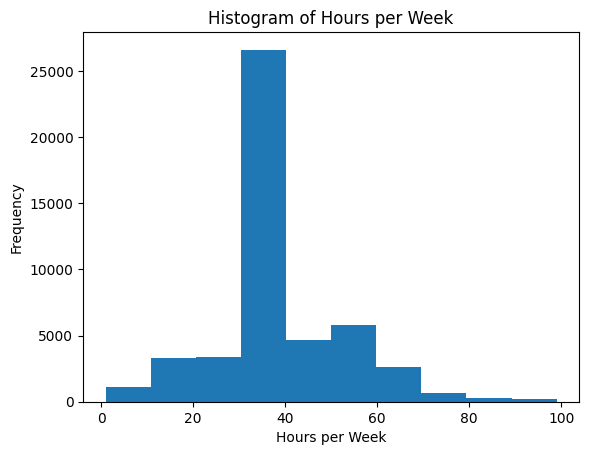

In [15]:
plt.hist(data["hours-per-week"])
plt.title("Histogram of Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

In [16]:
data["hours-per-week"].describe()

,hours-per-week
count,48790.000000
mean,40.425886
std,12.392729
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


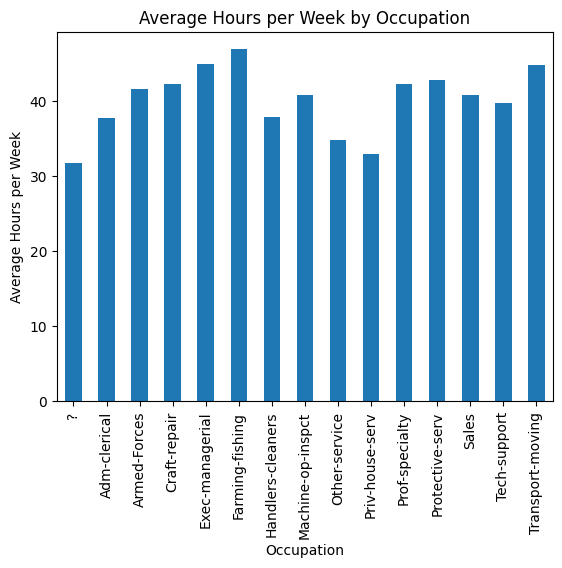

In [17]:
data.groupby("occupation")["hours-per-week"].mean().plot(kind="bar")
plt.title("Average Hours per Week by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Hours per Week")
plt.show()

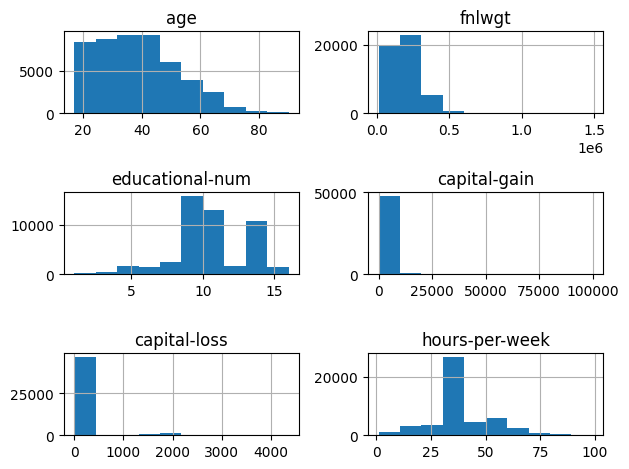

In [18]:
data.hist()
plt.tight_layout()

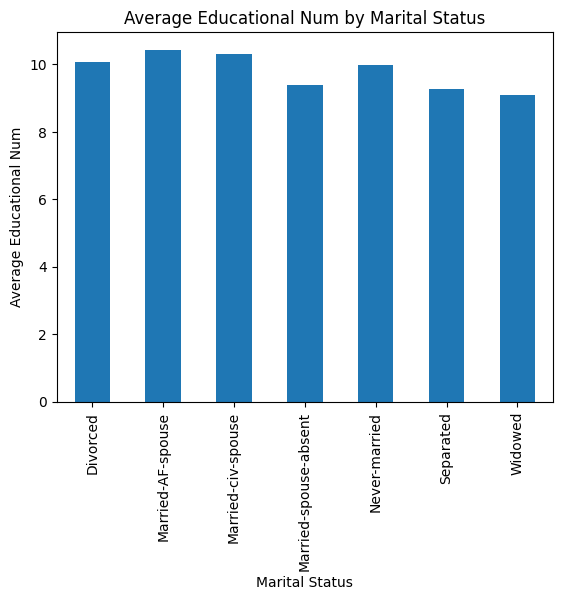

In [19]:
data.groupby("marital-status")["educational-num"].mean().plot(kind="bar")
plt.title("Average Educational Num by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Educational Num")
plt.show()

In [20]:
data["age"].describe()


,age
count,48790.000000
mean,38.652798
std,13.708493
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


**Splitting the data**

In [21]:
X=data.drop('hours-per-week',axis=1)
y=data['hours-per-week']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34153, 14), (14637, 14), (34153,), (14637,))

**Encoding data**

In [24]:
data["occupation"].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
?,2805
Transport-moving,2355


In [25]:
data["gender"].value_counts()

,count
gender,
Male,32614
Female,16176


In [26]:
label_cols=['gender', 'occupation']
for cols in label_cols:
  le=LabelEncoder()
  x_train[cols]= le.fit_transform(x_train[cols])
  x_test[cols]= le.transform(x_test[cols])

In [ ]:
desired_order=[[ 'Machine-op-inspct', 'Farming-fishing', 'Tech-support']]
ordinal_encoder = OrdinalEncoder(categories=desired_order)
x_train['occupation'] = ordinal_encoder.fit_transform(x_train[['occupation']])
x_test['occupation'] = ordinal_encoder.transform(x_test[['occupation']])

In [28]:

x_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,native-country,income
44862,19,Private,96483,HS-grad,9,Never-married,8,Own-child,Asian-Pac-Islander,0,0,0,United-States,<=50K
30067,53,Private,47396,Some-college,10,Married-civ-spouse,1,Husband,White,1,0,0,United-States,>50K
39314,19,Private,206777,HS-grad,9,Never-married,6,Other-relative,White,1,0,0,United-States,<=50K
22732,37,State-gov,191779,Some-college,10,Married-civ-spouse,3,Husband,White,1,0,0,United-States,<=50K
14574,38,Private,165579,HS-grad,9,Divorced,13,Not-in-family,White,1,0,0,United-States,<=50K


**Feature selection**

In [29]:
# Identify the remaining categorical columns
categorical_cols = x_train.select_dtypes(include='object').columns
print("Categorical columns to encode:", categorical_cols)

# Apply one-hot encoding to the remaining categorical columns
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Ensure that both train and test sets have the same columns after one-hot encoding
# This handles cases where a category might be present in one set but not the other
train_cols = x_train.columns
test_cols = x_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    x_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    x_train[c] = 0

x_test = x_test[train_cols] # Ensure the order of columns is the same

print("\nShape of x_train after one-hot encoding:", x_train.shape)
print("Shape of x_test after one-hot encoding:", x_test.shape)

Categorical columns to encode: Index(['workclass', 'education', 'marital-status', 'relationship', 'race',
       'native-country', 'income'],
      dtype='object')

Shape of x_train after one-hot encoding: (34153, 87)
Shape of x_test after one-hot encoding: (14637, 87)


In [30]:
# Now apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=6)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)

print("\nShape of x_train after feature selection:", x_train_new.shape)
print("Shape of x_test after feature selection:", x_test_new.shape)

# Get the selected features
selected_features_indices = selector.get_support(indices=True)
selected_features = x_train.columns[selected_features_indices]
print("\nSelected features:", selected_features)


Shape of x_train after feature selection: (34153, 6)
Shape of x_test after feature selection: (14637, 6)

Selected features: Index(['educational-num', 'gender', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'relationship_Own-child',
       'income_>50K'],
      dtype='object')


In [31]:
selector.get_feature_names_out()

array(['educational-num', 'gender', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'relationship_Own-child',
       'income_>50K'], dtype=object)

In [32]:
x_train_new= pd.DataFrame(x_train_new, columns=selector.get_feature_names_out())
x_test_new= pd.DataFrame(x_test_new, columns=selector.get_feature_names_out())

In [33]:
x_train_new.head()

,educational-num,gender,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Own-child,income_>50K
0,9,0,0,1,1,0
1,10,1,1,0,0,1
2,9,1,0,1,0,0
3,10,1,1,0,0,0
4,9,1,0,0,0,0


**Correlation study**

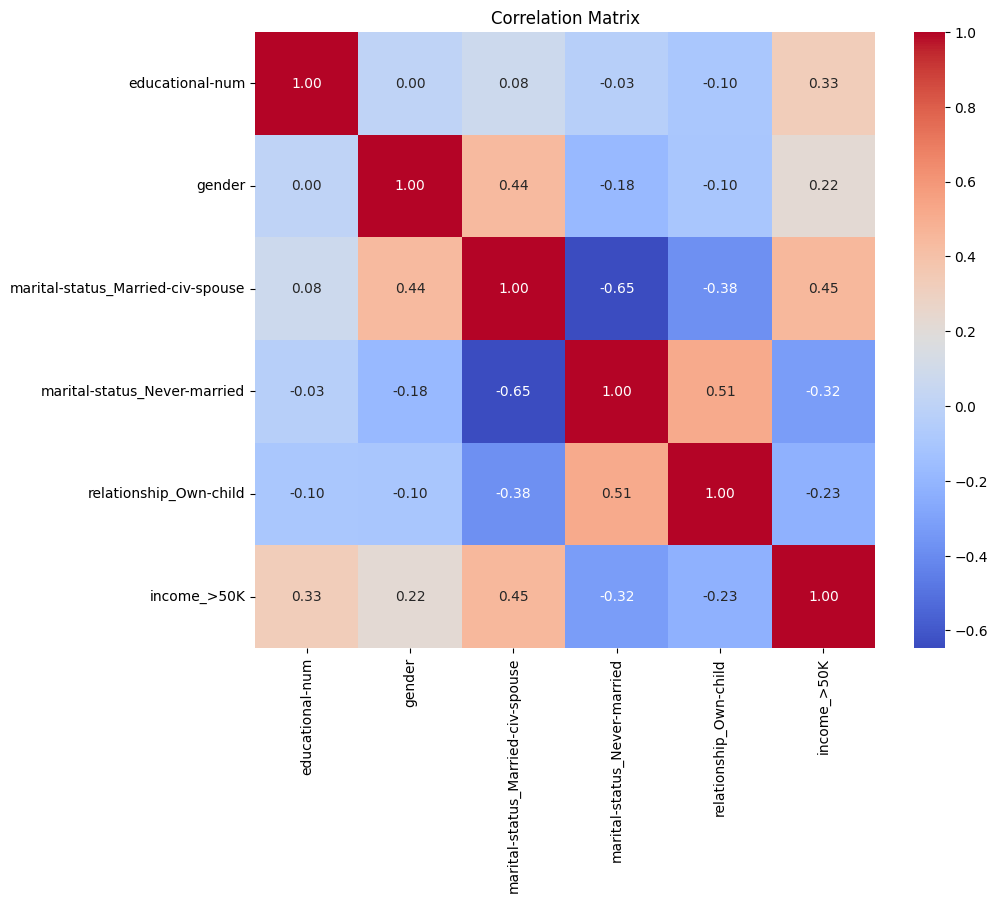

In [34]:
corr_matrix= x_train_new.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Models**

Helper functions to streamline the process

In [35]:
def scorer(model_name, dictionary_name, y_test, pred):
  '''
    A metric scorer for regression tasks

    This function takes the following arguments:
    - model_name: a string representing the name of the model.
    - dictionary_name: a dictionary where the scores will be stored.
    - y_test: a pandas Series or array representing the true target values for the test set.
    - pred: a pandas Series or array representing the predicted target values for the test set.

    The function calculates Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 score for the model,
    stores them in the provided dictionary under the key of the model name, and returns the dictionary.

  '''
  from sklearn import metrics
  dictionary_name[model_name]={'Mean Absolute Error' : metrics.mean_absolute_error(y_test, pred),
                              'Mean Squared Error' : metrics.mean_squared_error(y_test, pred),
                              'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred)),
                              'R2 score' : metrics.r2_score(y_test,pred)}
  return dictionary_name[model_name]

In [36]:
def train_test_score_compare(model, x_train, x_test, y_train, y_test):
  from sklearn import metrics
  model.fit(x_train, y_train)

  # Predict
  y_pred_train = model.predict(x_train_new)
  y_pred_test = model.predict(x_test_new)

  # Evaluate the model
  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  r2_train = r2_score(y_train, y_pred_train)

  mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  r2_test = r2_score(y_test, y_pred_test)

  print(f"{model} values:")
  print("Train MAE:", mae_train)
  print("Train MSE:", mse_train)
  print("Train R2:", r2_train)
  print("Test MAE:", mae_test)
  print("Test MSE:", mse_test)
  print("Test R2:", r2_test)

**Defining a scores dataframe to store model scores.**

In [37]:
scores = pd.DataFrame()
pd.set_option('display.float_format', lambda x: '%.12f' % x)

**Lasso Regression**

In [38]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=2, max_iter=10000)
lasso.fit(x_train_new,y_train)
pred=lasso.predict(x_test_new)

In [39]:
scorer('Lasso Regression', scores, y_test, pred)

,Lasso Regression
Mean Absolute Error,7.530735922019
Mean Squared Error,147.982416372157
Root Mean Squared Error,12.164802356477
R2 score,0.018073178438


In [40]:
train_test_score_compare(lasso, x_train_new, x_test_new, y_train, y_test)

Lasso(alpha=2, max_iter=10000) values:
Train MAE: 7.640340877221387
Train MSE: 152.41693982118508
Train R2: 0.015426462836337307
Test MAE: 7.530735922018676
Test MSE: 147.98241637215696
Test R2: 0.018073178438231863


**Random Forest Regressor**

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train_new,y_train)
pred=rf.predict(x_test_new)


In [42]:
scorer('Random Forest Regressor', scores, y_test, pred)

,Random Forest Regressor
Mean Absolute Error,7.699992924622
Mean Squared Error,127.017424572935
Root Mean Squared Error,11.270200733480
R2 score,0.157184893642


In [43]:
train_test_score_compare(rf, x_train_new, x_test_new, y_train, y_test)

RandomForestRegressor() values:
Train MAE: 7.7580963728275
Train MSE: 129.58834443965588
Train R2: 0.16289321377386123
Test MAE: 7.70182391818
Test MSE: 127.0577782085878
Test R2: 0.15691712995617302


**Gradient Boosting Machine**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train_new,y_train)
pred=gbr.predict(x_test_new)


In [45]:
scorer('Gradient Boosting Regressor', scores, y_test, pred)

,Gradient Boosting Regressor
Mean Absolute Error,7.659629979836
Mean Squared Error,125.996135940143
Root Mean Squared Error,11.224800040096
R2 score,0.163961581884


In [46]:
train_test_score_compare(gbr, x_train_new, x_test_new, y_train, y_test)


GradientBoostingRegressor() values:
Train MAE: 7.782336133650823
Train MSE: 130.87398497660965
Train R2: 0.1545883124126699
Test MAE: 7.65962997983638
Test MSE: 125.99613594014257
Test R2: 0.16396158188395094


**XGboost**

In [47]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x_train_new,y_train)
pred=xgb.predict(x_test_new)

In [48]:
scorer('XGBoost Regressor', scores, y_test, pred)

,XGBoost Regressor
Mean Absolute Error,7.697432518005
Mean Squared Error,127.051528930664
Root Mean Squared Error,11.271713664331
R2 score,0.156958580017


In [49]:
train_test_score_compare(xgb, x_train_new, x_test_new, y_train, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) values:
Train MAE: 7.752371788024902
Train MSE: 129.5676727294922
Train R2: 0.1630268096923828
Test MAE: 7.697432518005371
Test MSE: 127.05152893066406
Test R2: 0.15695858001708984


**K-nearest Neighbours Regression**

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train_new,y_train)
pred=knn.predict(x_test_new)


In [53]:
scorer('K-Nearest Neighbour Regression', scores, y_test, pred)

,K-Nearest Neighbour Regression
Mean Absolute Error,8.804823392772
Mean Squared Error,149.309724670356
Root Mean Squared Error,12.219235846417
R2 score,0.009265918424


In [54]:
train_test_score_compare(knn, x_train_new, x_test_new, y_train, y_test)

KNeighborsRegressor() values:
Train MAE: 8.886668813867011
Train MSE: 152.68210230433638
Train R2: 0.013713582599628293
Test MAE: 8.804823392771743
Test MSE: 149.30972467035593
Test R2: 0.009265918424275932


**Visualizing score to select the best performing model**

In [55]:
scores

,Lasso Regression,Random Forest Regressor,Gradient Boosting Regressor,XGBoost Regressor,K-Nearest Neighbour Regression
Mean Absolute Error,7.530735922019,7.699992924622,7.659629979836,7.697432518005,8.804823392772
Mean Squared Error,147.982416372157,127.017424572935,125.996135940143,127.051528930664,149.309724670356
Root Mean Squared Error,12.164802356477,11.270200733480,11.224800040096,11.271713664331,12.219235846417
R2 score,0.018073178438,0.157184893642,0.163961581884,0.156958580017,0.009265918424


In [56]:

scores_trans= scores.T

Text(0.5, 1.0, 'Mean Absolute Error')

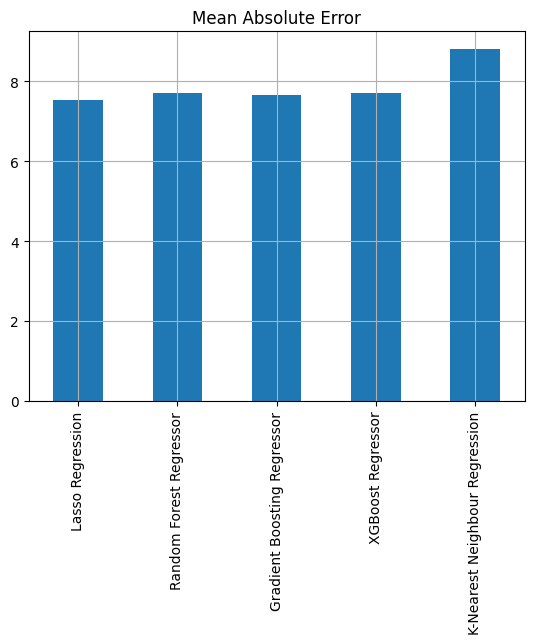

In [57]:

scores_trans['Mean Absolute Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Mean Absolute Error')

Text(0.5, 1.0, 'Mean Squared Error')

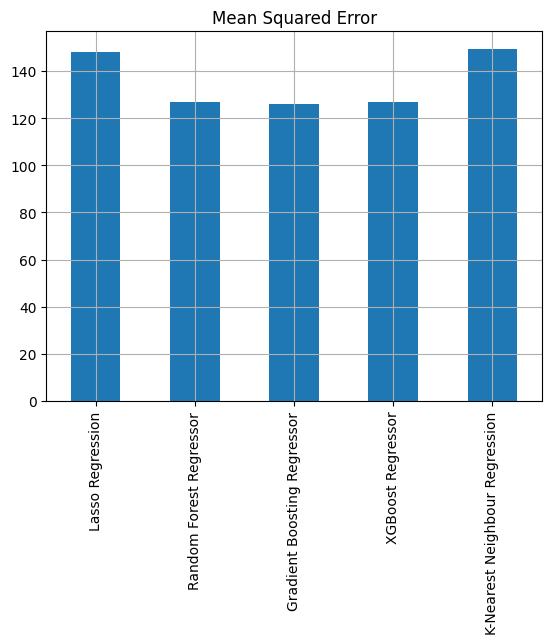

In [58]:

scores_trans['Mean Squared Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Mean Squared Error')

Text(0.5, 1.0, 'Root Mean Squared Error')

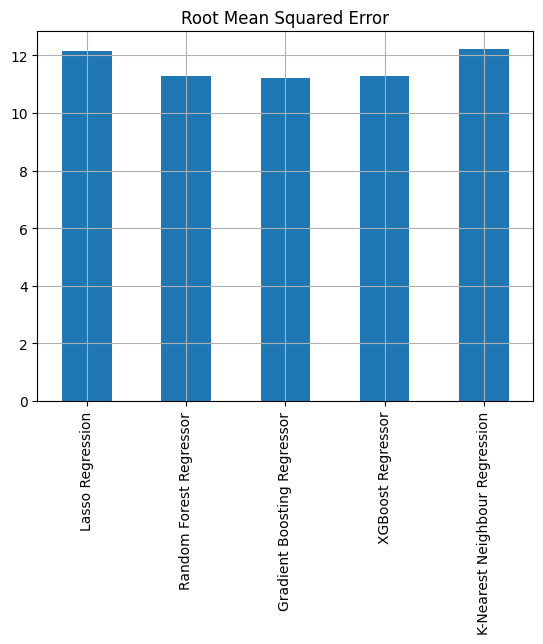

In [59]:

scores_trans['Root Mean Squared Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Root Mean Squared Error')

Text(0.5, 1.0, 'R2 score')

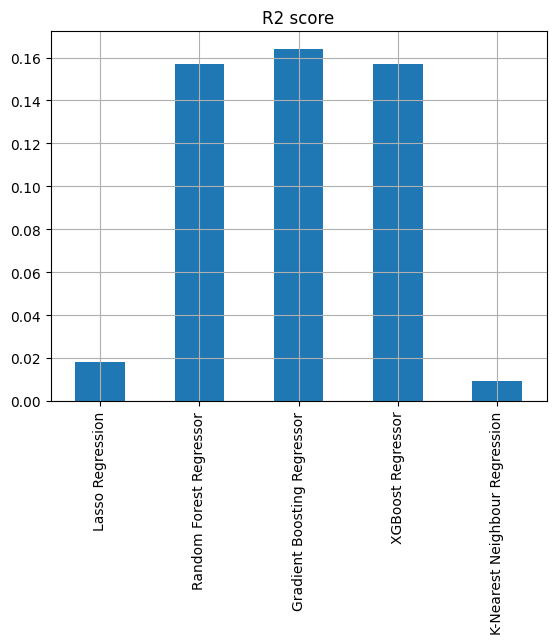

In [60]:

scores_trans['R2 score'].plot(kind= 'bar')
plt.grid(True)
plt.title('R2 score')


In [62]:

best_r2_model = scores.T['R2 score'].idxmax()
highest_r2_score = scores.T['R2 score'].max()

print(f"The model with the highest R2 score is: {best_r2_model}")
print(f"The highest R2 score is: {highest_r2_score:.4f}")


best_mae_model = scores.T['Mean Absolute Error'].idxmin()
lowest_mae_score = scores.T['Mean Absolute Error'].min()

print(f"\nThe model with the lowest Mean Absolute Error is: {best_mae_model}")
print(f"The lowest Mean Absolute Error is: {lowest_mae_score:.4f}")


best_rmse_model = scores.T['Root Mean Squared Error'].idxmin()
lowest_rmse_score = scores.T['Root Mean Squared Error'].min()

print(f"\nThe model with the lowest Root Mean Squared Error is: {best_rmse_model}")
print(f"The lowest Root Mean Squared Error is: {lowest_rmse_score:.4f}")


The model with the highest R2 score is: Gradient Boosting Regressor
The highest R2 score is: 0.1640

The model with the lowest Mean Absolute Error is: Lasso Regression
The lowest Mean Absolute Error is: 7.5307

The model with the lowest Root Mean Squared Error is: Gradient Boosting Regressor
The lowest Root Mean Squared Error is: 11.2248
